<a href="https://colab.research.google.com/github/ACSE-jl2722/ci_mpm/blob/master/DL_module_Coursework_I_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1dFgNX9iQUfmBOdmUN2-H8rPxL3SLXmxn" width="400"/>


---


### ***Name***: [*your name goes here*]
### ***CID***: [*your CID goes here*]

# Instructions:

Follow the instructions below to complete the coursework and submit it:

<br>

1. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power). Your copy of the notebook should be named: `yourusername_coursework_I.ipynb`. And don't forget to fill in the two fields at the top of this notebook with your name and CID.

<br>

2. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link. Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not rerun code blocks in the notebooks, it is your responsibility to run them before uploading the notebook.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but **you can add any coding or markdown blocks you need**.

<br>

3. The coursework is released on **Friday 9 December at 14:00h UK time**, and the answers have to be submitted on **Monday 12 December, 20:00h UK time**. We will not accept late submissions.

<br>

<br>

### The coursework consists of 5 questions you have to complete. You will find them below. 

- Questions 2 and 3 are very similar and you have to complete both of them, **you DO NOT have to choose one of them, you have to do them both.**

- You can use code seen in class, but indicate clearly when you do, and **make it clear (using comments or markdown blocks) what are your modifications**. This will influence your final marks.

- Your final marks will depend both on the quality of your results **AND** the justification, explanation and rationale of your implementations.

- Reference any publications and other materials that you use, but keep in mind that **your implementations should be original and not copied from any online resources (we will check for plagiarism)**. It is ok to use other resources to understand concepts and draw inspiration, but always reference them properly in the notebook.

- Finally, **justify your answers well, but focus on what the question is asking**. I will penalise lengthy answers that do not have any relation with the question being addressed.

<br>

---

<br>

## Imports

In [57]:
### write the imports you will need here.
!pip install livelossplot
%pylab inline

from livelossplot import PlotLosses

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit


import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import numpy as np
import pandas as pd
import random 

def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True

device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Populating the interactive namespace from numpy and matplotlib
Cuda installed! Running on GPU!


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['Generator', 'figure', 'step', 'sample']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [58]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
except:
  pass

Mounted at /content/drive


<br>

---

<br>

## **Q1** - Download and prepare the Fashion MNIST dataset [10 points]

Get the `FashionMNIST` dataset from `torchvision.datasets`

- Inspect the dataset and format the data as you see fit to use it in your next questions. Explain the process you follow.

- Plot a matrix of images with 10 examples of each class.

- Is the dataset well balanced (does it have similar number of samples for each class)? Generate and present data to support your answer in any form you see fit.

In [59]:
# read data，using transform function is for normalize data
import torchvision
# add the transform
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5), std=(0.5))])
 

train_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train=True, download=True, transform=trans)
test_dataset = torchvision.datasets.FashionMNIST(root="./Fa_data", train= False, download=True, transform=trans)

In [61]:
# how many classes in the data？
class_to_idx = list(train_dataset.class_to_idx)
print(class_to_idx)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


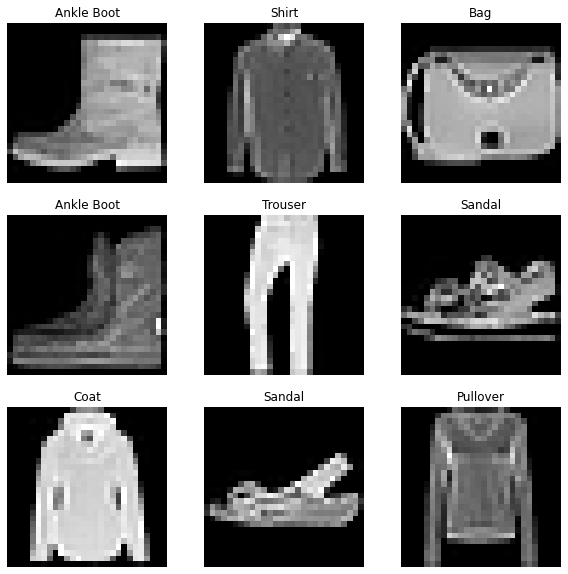

In [62]:
# show each data type
labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(10, 10))
cols, rows = 3,3
set_seed(42)
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Plot a matrix of images with 10 examples of each class.

torch.Size([100, 1, 28, 28]) torch.Size([100])


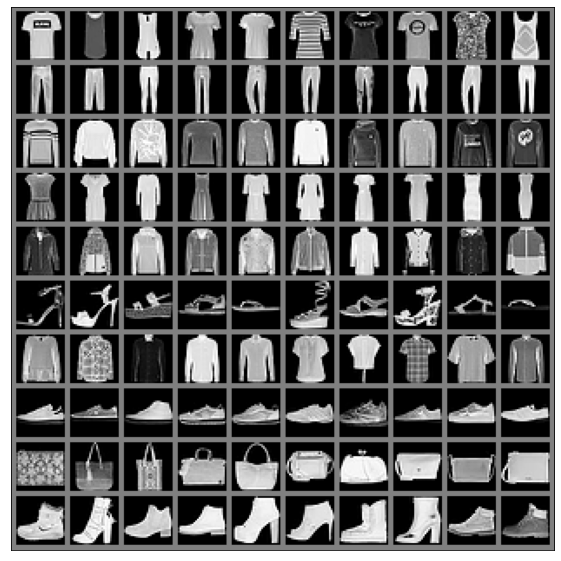

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9])


In [63]:
#reshape the data，show 10 items for the same class
from itertools import cycle
class RepeatClassSampler(torch.utils.data.Sampler):
    def __init__(self, targets, repeat_count, length, shuffle=False):
        if not torch.is_tensor(targets):
            targets = torch.tensor(targets)

        self.targets = targets
        self.repeat_count = repeat_count
        self.length = length
        self.shuffle = shuffle

        self.classes = torch.unique(targets).tolist()
        self.class_indices = dict()
        for label in self.classes:
            self.class_indices[label] = torch.nonzero(targets == label).flatten() 
    def __iter__(self):
        class_index_iters = dict()
        for label in self.classes:
            if self.shuffle:
                class_index_iters[label] = cycle(self.class_indices[label][torch.randperm(len(self.class_indices))].tolist())
            else:
                class_index_iters[label] = cycle(self.class_indices[label].tolist())
        xx=[0,1,2,3,4,5,6,7,8,9]
        target_iter = cycle(xx)   
        def index_generator():
            for i in range(self.length):
                if i % self.repeat_count == 0:
                    current_class = next(target_iter)
                yield next(class_index_iters[current_class])   
        return index_generator()

    def __len__(self):
        return self.length

dataloader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=100,
        sampler=RepeatClassSampler(
            targets=train_dataset.targets,
            repeat_count=10,
            length=100,      
            shuffle=False))

set_seed(42)
batch_size = 100 # The batch size change
num_workers = 0 # Subprocess for loading the data

train_batch_sample, train_batch_targets = next(iter(dataloader)) # syntax for directly iterating over the data loader
print(train_batch_sample.shape, train_batch_targets.shape)

# Visualise batch
from torchvision.utils import make_grid
batch_grid = make_grid(train_batch_sample, nrow=10, padding=3)
plt.figure(figsize=(10,10))
plt.imshow(batch_grid[0], cmap="gray") # index because make_grid transforms grayscale images to RGB
plt.xticks([])
plt.yticks([])
plt.show()

print(train_batch_targets)

###The dataset is well balanced. 
<br>
<br>
Every clothing item has 6,000 samples which can be shown as:

In [64]:
# show how many Sample overall
targets = train_dataset.targets		
len_target = len(targets)
print("Overall we have {} samples".format(len_target))

Overall we have 60000 samples


In [65]:
# count samples for each label
# we found the labels are well balanced
num_count = [0] * 10

for i in targets:
    num = i.item()
    num_count[num] += 1

num_count = pd.DataFrame(num_count)
print(num_count)  

      0
0  6000
1  6000
2  6000
3  6000
4  6000
5  6000
6  6000
7  6000
8  6000
9  6000


<br>

---

<br>

## **Q2** - Implement a **conditional VAE** [25 points]

Implement a VAE similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your decoder, you have to tell it which class you want it to generate. <br> *During the lectures we created a VAE that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation 
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional VAE to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?

Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).



### My modifications

1.   The input size is added a the fully connected layer of the encoder and decoder network to match the input of image+label;
2.   the activation function is modified from the original sigmoid to ReLU because we do not need output from (0，1)
3.   Data augmentation： increasing the probability of random rotation angle and increases the probability of random flip
4. change the loss function to binary cross-entropy








### generate and plot 10 new samples 
please see in the goole drive

/content/output/Epoch_40.jpg




###  hyperparameters to optimise

Which ones would you choose and why?

### code

In [89]:
# new
import os
import time
import torch
import argparse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from collections import defaultdict
import torchvision.datasets as dsets
import torch.nn as nn
import PIL.Image as Image
import torchvision.transforms as tforms
import torchvision

transform = tforms.Compose(
    [tforms.Resize(size=(28, 28), interpolation=Image.BICUBIC),
    #  tforms.Grayscale(),
     tforms.ToTensor(),]
    #  tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)]
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


batch_size = 500
encoder_layer_sizes=[784, 256]
decoder_layer_sizes=[256, 784]
latent_size=2
print_every=100
epochs = 100
def mkdir(paths):
    if not isinstance(paths, (list, tuple)):
        paths = [paths]
    for path in paths:
        if not os.path.isdir(path):
            os.makedirs(path)
mkdir("output")

In [90]:

data_loader = DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

def loss_fn(recon_x, x, mean, log_var):
    BCE = torch.nn.functional.binary_cross_entropy(
        recon_x.view(-1, 28*28), x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    return (BCE + KLD) / x.size(0)

def idx2onehot(idx, n):

    assert torch.max(idx).item() < n

    if idx.dim() == 1:
        idx = idx.unsqueeze(1)
    onehot = torch.zeros(idx.size(0), n).to(idx.device)
    onehot.scatter_(1, idx, 1)
    
    return onehot

In [91]:
class VAE(nn.Module):

    def __init__(self, encoder_layer_sizes, latent_size, decoder_layer_sizes, num_labels=0):
        super().__init__()

        assert type(encoder_layer_sizes) == list
        assert type(latent_size) == int
        assert type(decoder_layer_sizes) == list
        self.latent_size = latent_size
        self.encoder = Encoder(
            encoder_layer_sizes, latent_size, num_labels)
        self.decoder = Decoder(
            decoder_layer_sizes, latent_size, num_labels)

    def forward(self, x, c=None):
        if x.dim() > 2:
            x = x.view(-1, 28*28)
        means, log_var = self.encoder(x, c)
        z = self.reparameterize(means, log_var)
        recon_x = self.decoder(z, c)

        return recon_x, means, log_var, z

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def inference(self, z, c=None):
        recon_x = self.decoder(z, c)
        return recon_x


class Encoder(nn.Module):
    def __init__(self, layer_sizes, latent_size, num_labels):
        super().__init__()

        layer_sizes[0] += num_labels
        self.MLP = nn.Sequential()

        for i, (in_size, out_size) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
            self.MLP.add_module(
                name="L{:d}".format(i), module=nn.Linear(in_size, out_size))
            self.MLP.add_module(name="A{:d}".format(i), module=nn.ReLU())

        self.linear_means = nn.Linear(layer_sizes[-1], latent_size)
        self.linear_log_var = nn.Linear(layer_sizes[-1], latent_size)

    def forward(self, x, c=None):
        c = idx2onehot(c, n=10)
        x = torch.cat((x, c), dim=-1)
        x = self.MLP(x)
        means = self.linear_means(x)
        log_vars = self.linear_log_var(x)

        return means, log_vars


class Decoder(nn.Module):
    def __init__(self, layer_sizes, latent_size, num_labels):
        super().__init__()
        self.MLP = nn.Sequential()
        input_size = latent_size + num_labels

        for i, (in_size, out_size) in enumerate(zip([input_size]+layer_sizes[:-1], layer_sizes)):
            self.MLP.add_module(
                name="L{:d}".format(i), module=nn.Linear(in_size, out_size))
            if i+1 < len(layer_sizes):
                self.MLP.add_module(name="A{:d}".format(i), module=nn.ReLU())
            else:
                self.MLP.add_module(name="sigmoid", module=nn.Sigmoid())

    def forward(self, z, c):
        c = idx2onehot(c, n=10)
        z = torch.cat((z, c), dim=-1)

        x = self.MLP(z)

        return x


In [92]:
vae = VAE(
    encoder_layer_sizes=encoder_layer_sizes,
    latent_size=latent_size,
    decoder_layer_sizes=decoder_layer_sizes,
    num_labels=10).to(device)

In [93]:
optimizer = torch.optim.Adam(vae.parameters(), lr=0.001)

logs = defaultdict(list)

for epoch in range(epochs):

    tracker_epoch = defaultdict(lambda: defaultdict(dict))

    for iteration, (x, y) in enumerate(data_loader):

        x, y = x.to(device), y.to(device)

        # if args.conditional:
        recon_x, mean, log_var, z = vae(x, y)
        # else:
            # recon_x, mean, log_var, z = vae(x)

        loss = loss_fn(recon_x, x, mean, log_var)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        logs['loss'].append(loss.item())
    print(epoch)
    if epoch % 10 == 0:
        for i in range(10):
            c = torch.arange(0, 10).long().unsqueeze(1).to(device)
            z = torch.randn([c.size(0),latent_size]).to(device)
            if i == 0:
                result = vae.inference(z, c=c)
                result = result.view(10,1,28,28)
            else:
                x = vae.inference(z, c=c)
                x = x.view(10,1,28,28)
                result = torch.cat([result,x],dim = 0)

        torchvision.utils.save_image(result, 'output/Epoch_%d.jpg'% epoch, nrow=10)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


<br>

---

<br>

## **Q3** - Implement a **conditional GAN** that generates a user-defined class [25 points]

Implement a GANs similar to the one we saw in class but with the following modifications:

- Your new network should generate samples of any class defined by the user, that is, when you run your generator, you have to tell it which class you want it to generate. <br> *During the lectures we created a GAN that would generate samples of any class, we did not have control over which class would be generated. The exercise is to modify the network, training loops, and anything else you consider necessary, so that, once is trained, you can generate images of any particular class specified when you run your generative model.*

- Expand your network to include **at least two** of the following modifications. Choose them based on what you think will result in better network performance (make sure to justify your choices well, argumenting why did you decide to include your particular modifications):
  - Convolutional layers
  - Data augmentation
  - Different activations
  - Different random seed
  - Other network modifications that are well justified. <br> *You have freedom to choose what to do here, but your marks will depend not only on the correct implementation but also on the justification of your choices.*

- Use your trained conditional GAN to **generate and plot 10 new samples of each class** by adding the class label to your random input (in any form you have implemented it).

- You **DO NOT** have to optimise any hyperparameters, but if you had to choose three hyperparameters to optimise:
  - Which ones would you choose and why?
  - Would they be different from your choices in **Q2**?


Generate information of your training process (liveloss plots, or any other data that will help you understand your results and analyse them in the last question **Q4**).

### My modification


1.   The generator is changed from a fully connected layer to a deconvolutional layer and uses batch normalization and ReLu activation function.
2.  The discriminator is changed from a fully connected layer to a convolutional layer and uses the LeakyRelu activation function, and the final sigmoid activation function is removed.



> I changed the Convolutional layers to cnn and also change the Different activations.
<br>
Because for larger dataset than this, convolutional layers are better suited for image problems.
<br> 
CNN can share the paremeters:Each cnn it find a specific feature for the image(for example,Horizontal edge detector or vertical line detector for image） parameters can be used in many parts.
<br>
if we have colors, we can use 3 channels(rgb)cnn to train. This is very effiencient for images.
<br>
CNN also plays well in capturing translationing invariance.(shift pixels but still can see the "fashion item clearly".
<br>
In the end, the in each layer, each output value depends on small amount of input.


3. The loss function adopts the WGAN approach and no longer calculates the cross-entropy. Instead, it directly maximizes the output value of the real sample and minimizes the output value of the generated sample

4.  The input dimension is increased by size to match the image + label input



###Generate and plot 10 new samples

Picture could be found in the google drive: /content/output/CGAN_default/sample_training

### Hyperparameters to optimise

### Code

In [67]:
from sklearn.metrics import accuracy_score
from livelossplot import PlotLosses
import torchvision.transforms as tforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np
import PIL.Image as Image
import os
import torchvision
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
batch_size = 500
device = 'gpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

def mkdir(paths):
    if not isinstance(paths, (list, tuple)):
        paths = [paths]
    for path in paths:
        if not os.path.isdir(path):
            os.makedirs(path)
experiment_name =  "CGAN"

mkdir('./output/%s' % experiment_name)



Cuda installed! Running on GPU!


In [68]:
transform = transforms.Compose([
    tforms.Resize(size=(32, 32), interpolation=Image.BICUBIC),
    tforms.ToTensor(),
    tforms.Lambda(lambda x: torch.cat((x, x, x), dim=0)),
    tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
# train_dataset = FashionMNIST(root='./fashion_mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=device,
    drop_last=True
)

/usr/local/lib/python3.8/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [69]:
#generate network by cnn
class Generator(nn.Module):
    def __init__(self, z_dim, c_dim, dim=128):
        super(Generator, self).__init__()

        def dconv_bn_relu(in_dim, out_dim, kernel_size=4, stride=2, padding=1, output_padding=0):
            return nn.Sequential(
                nn.ConvTranspose2d(in_dim, out_dim, kernel_size, stride, padding, output_padding),
                nn.BatchNorm2d(out_dim),
                nn.ReLU()
            )

        self.ls = nn.Sequential(
            dconv_bn_relu(z_dim + c_dim, dim * 4, 4, 1, 0, 0),  # (N, dim * 4, 4, 4)
            dconv_bn_relu(dim * 4, dim * 2),  # (N, dim * 2, 8, 8)
            dconv_bn_relu(dim * 2, dim),   # (N, dim, 16, 16)
            nn.ConvTranspose2d(dim, 3, 4, 2, padding=1), nn.Tanh()  # (N, 3, 32, 32)
        )

    def forward(self, z, c):
        # z: (N, z_dim), c: (N, c_dim)
        x = torch.cat([z, c], 1)
        test = x.view(x.size(0), x.size(1), 1, 1)
        x = self.ls(test)
        return x

class NoOp(nn.Module):
    
    def __init__(self, *args, **keyword_args):
        super(NoOp, self).__init__()

    def forward(self, x):
        return x


class Reshape(nn.Module):
    
    def __init__(self, *new_shape):
        super(Reshape, self).__init__()
        self._new_shape = new_shape

    def forward(self, x):
        new_shape = (x.size(i) if self._new_shape[i] == 0 else self._new_shape[i] for i in range(len(self._new_shape)))
        return x.view(*new_shape)
#Discriminator
class Discriminator(nn.Module):

    def __init__(self, x_dim, c_dim, dim=96):
        super(Discriminator, self).__init__()

        norm_fn = NoOp
        weight_norm_fn = torch.nn.utils.spectral_norm

        def conv_norm_lrelu(in_dim, out_dim, kernel_size=3, stride=1, padding=1):
            return nn.Sequential(
                weight_norm_fn(nn.Conv2d(in_dim, out_dim, kernel_size, stride, padding)),
                norm_fn(out_dim),
                nn.LeakyReLU(0.2)
            )

        self.ls = nn.Sequential(  # (N, x_dim+c_dim, 32, 32)
            conv_norm_lrelu(x_dim + c_dim, dim),
            conv_norm_lrelu(dim, dim),
            conv_norm_lrelu(dim, dim, stride=2),  # (N, dim , 16, 16)

            conv_norm_lrelu(dim, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2, stride=2),  # (N, dim*2, 8, 8)

            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=3, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),  # (N, dim*2, 6, 6)

            nn.AvgPool2d(kernel_size=6),  # (N, dim*2, 1, 1)
            Reshape(-1, dim * 2),  # (N, dim*2)
            weight_norm_fn(nn.Linear(dim * 2, 1))  # (N, 1)
        )

    def forward(self, x, c):
        # x: (N, x_dim, 32, 32), c: (N, c_dim)
        c = c.view(c.size(0), c.size(1), 1, 1) * torch.ones([c.size(0), c.size(1), x.size(2), x.size(3)], dtype=c.dtype, device=c.device)
        logit = self.ls(torch.cat([x, c], 1))
        return logit

#Discriminator loss function
def d_loss_fn(r_logit, f_logit):
    r_loss = torch.max(1 - r_logit, torch.zeros_like(r_logit)).mean()
    f_loss = torch.max(1 + f_logit, torch.zeros_like(f_logit)).mean()
    return r_loss, f_loss
#generate loss
def g_loss_fn(f_logit):
    f_loss = - f_logit.mean()
    return f_loss

In [70]:
z_dim = 100
c_dim = 10
# build model
G = Generator(z_dim=z_dim, c_dim=c_dim).to(device)
D = Discriminator(x_dim=3, c_dim=c_dim).to(device)


# optimiser
lr = 0.0001 
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)

def D_train(x,c_dense):
    #-------------- Function of the discriminator training -------------------#
    D.train()
    D_optimizer.zero_grad()

    # train discriminator on real data -- assign high score (use 1 here)
    # x_real, y_real = x.view(-1, 32*32), torch.ones(batch_size, 1)  # we are assigning the label 'real data' to the samples (don't care anymore about what number they are)
    x_real = x.to(device)
    #print(x_real)
    D_output = D(x_real,c_dense)

    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    x_fake = G(z,c_dense).detach()

    D_fake_output = D(x_fake,c_dense)
    d_x_gan_loss, d_x_f_gan_loss = d_loss_fn(D_output, D_fake_output)
    D_loss = d_x_gan_loss+d_x_f_gan_loss
    # combine the losses

    # model update 
    D.zero_grad()
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

def G_train(x,c_dense):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimizer.zero_grad()

    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    G_output = G(z,c_dense)

    # obtain scores from D for the generated data
    D_output = D(G_output,c_dense)

    # train generator to "fool" discriminator
    G_loss = g_loss_fn(D_output)

    # model update 
    G.zero_grad()
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached


In [73]:
# run 30 epoch for time limit
z_sample = torch.randn(c_dim * 10, z_dim).to(device)
c_sample = torch.tensor(np.concatenate([np.eye(c_dim)] * 10), dtype=z_sample.dtype).to(device)

n_epoch = 1 # i have more epoch show in the google drive， 
# this epoch = 1 only for test purpose for time limitation
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)
z = torch.randn(batch_size, z_dim).to(device)
step = 0
for epoch in range(1, n_epoch+1):  
    D_losses, G_losses = [], []
    logs = {}
    for batch_idx, (x, c_dense) in enumerate(train_loader):
        step += 1
        c = torch.tensor(np.eye(c_dim)[c_dense.cpu().numpy()], dtype=z.dtype).to(device)
        print("epoch = %d,batch_idx = %d"%(epoch,batch_idx))
        logs['D_Loss'] = D_train(x,c)
        logs['G_Loss'] = G_train(x,c)

        # liveloss.update(logs)
        # liveloss.draw()

        if step % 100 == 0:
            G.eval()
            x_f_sample = (G(z_sample, c_sample) + 1) / 2.0

            save_dir = './output/%s/sample_training' % "CGAN_default"
            mkdir(save_dir)
            torchvision.utils.save_image(x_f_sample, '%s/Epoch_(%d)_(%dof%d).jpg' % (save_dir, epoch, batch_idx + 1, len(train_loader)), nrow=10)
            # save image，please find in the drive


    



epoch = 1,batch_idx = 0
epoch = 1,batch_idx = 1
epoch = 1,batch_idx = 2
epoch = 1,batch_idx = 3
epoch = 1,batch_idx = 4
epoch = 1,batch_idx = 5
epoch = 1,batch_idx = 6
epoch = 1,batch_idx = 7
epoch = 1,batch_idx = 8
epoch = 1,batch_idx = 9
epoch = 1,batch_idx = 10
epoch = 1,batch_idx = 11
epoch = 1,batch_idx = 12
epoch = 1,batch_idx = 13
epoch = 1,batch_idx = 14
epoch = 1,batch_idx = 15
epoch = 1,batch_idx = 16
epoch = 1,batch_idx = 17
epoch = 1,batch_idx = 18
epoch = 1,batch_idx = 19
epoch = 1,batch_idx = 20
epoch = 1,batch_idx = 21
epoch = 1,batch_idx = 22
epoch = 1,batch_idx = 23
epoch = 1,batch_idx = 24
epoch = 1,batch_idx = 25
epoch = 1,batch_idx = 26
epoch = 1,batch_idx = 27
epoch = 1,batch_idx = 28
epoch = 1,batch_idx = 29
epoch = 1,batch_idx = 30
epoch = 1,batch_idx = 31
epoch = 1,batch_idx = 32
epoch = 1,batch_idx = 33
epoch = 1,batch_idx = 34
epoch = 1,batch_idx = 35
epoch = 1,batch_idx = 36
epoch = 1,batch_idx = 37
epoch = 1,batch_idx = 38
epoch = 1,batch_idx = 39
epoch = 1,

In [ ]:
# todo：show the image from drive

it is generated on my local machine for 200 epoch. while I rerun the cgan in google colab and it is so slow，so i put a screenshot as a reference.

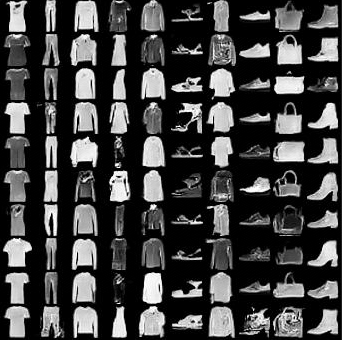

<br>

---

<br>

## **Q4** - Analysis and comparison of results [20 points]

Analyse and compare the results you have obtained with the two networks above.

- Use the data you generated training the three networks above to discuss the results you have generated in **Q2** and **Q3**.
- Is there a network that performs better than the other? Why do you think that is?
- What could you do to improve your results on each of the networks you have implemented? ***\[limit your answer to this question to 150 words\]***

**IMPORTANT NOTE**: even if you did not complete **Q2** and **Q3**, make sure to include a discussion with any partial results or other considerations regarding the performance of your implemented methods.

###cGAN is better in terms of picture quality. 
1) Although I use small epoch(like 5) for cGAn , the quality of image is more decent compared to cVae with small epoch.We can conclude that: cGAN generates sharper images,the cVAE has more smooth edges, with low image quality.
<br>
2) While cGANs need longer ** time **. Although 5 epoch, it spend longer time than cVAE. It is so time-consuming to rerun the network compared to vae.
<br>
3) The training result of cvae is  more stable than cgan.
<br>





### how to improve it?
For network itself:
<br>
1）Change the linear nerwork to CNN will be better.（only for vae). 
<br>
Notes: I have tried linear and it is even better than cnn in cgan， while I do not have time to change it back to linear, so only cgan with cnn showed above
<br>
2）I suppose add padding will also be better to make samples in the edges to be more useful.
<br>
3)  Stride can be bigger to make it faster.
<br>
4）For long time of gan, mobileNet based architecture that consists of depthwise separable convolution will reduce inference time according to [paper](https://arxiv.org/abs/2111.15438)
<br>
5）For VAE, one of the biggest problem is that KL may have some questions: KL-vanishing. KL is very important when we calculate the difference between 
Read a paper, we can try [cyclical annealing](https://arxiv.org/abs/1903.10145)
<br>

<br>

---

<br>

## **Q5** - Modify your dataset to create data imbalance and retrain **one** of your conditional models [20 points]

Modify the `FashionMNIST` dataset to eliminate 90% of the images corresponding to one of the classes in the dataset (whichever you want).

Now, **choose one of the two questions below (a or b)**:

- **Q5-a) Retrain your conditional VAE from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- **Q5-b) Retrain your conditional GAN from scratch** with this new dataset, and after training, use it to generate 10 images for the class you have decimated.

- Compare the results of this new images generated with the modified dataset with the original results from questions **Q2** or **Q3** (depending of whether you have chosen **Q5-a** or **Q5-b**). What do you observe? Describe your interpretation of this comparison.

### My oberservation in retraining conditional GAN 

Compare to the balance data using cgan, the imbalance one performes worse due to sometimes it give wrong classification for class 1 which have smaller samples.

<br>



### My interpretation
Becasue with unbalanced datasets, the cGAN are often biased towards the majority classes and therefore there is a higher miss-classification rate for the minority class instances(which is class 1 in my case).

From one paper, I learned generative adversarial network (GAN) using variational autoencoder (VAE) will fix the unbalance data problem is better, which can try in the future.

### Code

In [43]:
# dir set
batch_size = 500
device = 'gpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")

def mkdir(paths):
    if not isinstance(paths, (list, tuple)):
        paths = [paths]
    for path in paths:
        if not os.path.isdir(path):
            os.makedirs(path)
experiment_name =  "CGAN-Unbalance"

mkdir('./output/%s' % experiment_name)

Cuda installed! Running on GPU!


In [44]:
# data load
transform = transforms.Compose([
    tforms.Resize(size=(32, 32), interpolation=Image.BICUBIC),
    tforms.ToTensor(),
    tforms.Lambda(lambda x: torch.cat((x, x, x), dim=0)),
    tforms.Normalize(mean=[0.5] * 3, std=[0.5] * 3)])
# train_dataset = FashionMNIST(root='./fashion_mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(
    dataset=dsets.FashionMNIST('data/FashionMNIST', train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
    num_workers=0,
    pin_memory=device,
    drop_last=True
)

In [45]:
#generator
class Generator(nn.Module):
    def __init__(self, z_dim, c_dim, dim=128):
        super(Generator, self).__init__()

        def dconv_bn_relu(in_dim, out_dim, kernel_size=4, stride=2, padding=1, output_padding=0):
            return nn.Sequential(
                nn.ConvTranspose2d(in_dim, out_dim, kernel_size, stride, padding, output_padding),
                nn.BatchNorm2d(out_dim),
                nn.ReLU()
            )

        self.ls = nn.Sequential(
            dconv_bn_relu(z_dim + c_dim, dim * 4, 4, 1, 0, 0),  # (N, dim * 4, 4, 4)
            dconv_bn_relu(dim * 4, dim * 2),  # (N, dim * 2, 8, 8)
            dconv_bn_relu(dim * 2, dim),   # (N, dim, 16, 16)
            nn.ConvTranspose2d(dim, 3, 4, 2, padding=1), nn.Tanh()  # (N, 3, 32, 32)
        )

    def forward(self, z, c):
        # z: (N, z_dim), c: (N, c_dim)
        x = torch.cat([z, c], 1)
        test = x.view(x.size(0), x.size(1), 1, 1)
        x = self.ls(test)
        return x

class NoOp(nn.Module):
    
    def __init__(self, *args, **keyword_args):
        super(NoOp, self).__init__()

    def forward(self, x):
        return x


class Reshape(nn.Module):
    
    def __init__(self, *new_shape):
        super(Reshape, self).__init__()
        self._new_shape = new_shape

    def forward(self, x):
        new_shape = (x.size(i) if self._new_shape[i] == 0 else self._new_shape[i] for i in range(len(self._new_shape)))
        return x.view(*new_shape)
#  Discriminator
class Discriminator(nn.Module):

    def __init__(self, x_dim, c_dim, dim=96):
        super(Discriminator, self).__init__()

        norm_fn = NoOp
        weight_norm_fn = torch.nn.utils.spectral_norm

        def conv_norm_lrelu(in_dim, out_dim, kernel_size=3, stride=1, padding=1):
            return nn.Sequential(
                weight_norm_fn(nn.Conv2d(in_dim, out_dim, kernel_size, stride, padding)),
                norm_fn(out_dim),
                nn.LeakyReLU(0.2)
            )

        self.ls = nn.Sequential(  # (N, x_dim+c_dim, 32, 32)
            conv_norm_lrelu(x_dim + c_dim, dim),
            conv_norm_lrelu(dim, dim),
            conv_norm_lrelu(dim, dim, stride=2),  # (N, dim , 16, 16)

            conv_norm_lrelu(dim, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2),
            conv_norm_lrelu(dim * 2, dim * 2, stride=2),  # (N, dim*2, 8, 8)

            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=3, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),
            conv_norm_lrelu(dim * 2, dim * 2, kernel_size=1, stride=1, padding=0),  # (N, dim*2, 6, 6)

            nn.AvgPool2d(kernel_size=6),  # (N, dim*2, 1, 1)
            Reshape(-1, dim * 2),  # (N, dim*2)
            weight_norm_fn(nn.Linear(dim * 2, 1))  # (N, 1)
        )

    def forward(self, x, c):
        # x: (N, x_dim, 32, 32), c: (N, c_dim)
        c = c.view(c.size(0), c.size(1), 1, 1) * torch.ones([c.size(0), c.size(1), x.size(2), x.size(3)], dtype=c.dtype, device=c.device)
        logit = self.ls(torch.cat([x, c], 1))
        return logit

#loss of d
def d_loss_fn(r_logit, f_logit):
    r_loss = torch.max(1 - r_logit, torch.zeros_like(r_logit)).mean()
    f_loss = torch.max(1 + f_logit, torch.zeros_like(f_logit)).mean()
    return r_loss, f_loss
#loss of g
def g_loss_fn(f_logit):
    f_loss = - f_logit.mean()
    return f_loss

In [46]:
z_dim = 100
c_dim = 11
# build model
G = Generator(z_dim=z_dim, c_dim=c_dim).to(device)
D = Discriminator(x_dim=3, c_dim=c_dim).to(device)


# optimiser
lr = 0.0001 
G_optimizer = torch.optim.Adam(G.parameters(), lr = lr)
D_optimizer = torch.optim.Adam(D.parameters(), lr = lr)

def D_train(x,c_dense):
    #-------------- Function of the discriminator training -------------------#
    D.train()
    D_optimizer.zero_grad()

    # train discriminator on real data -- assign high score (use 1 here)
    # x_real, y_real = x.view(-1, 32*32), torch.ones(batch_size, 1)  # we are assigning the label 'real data' to the samples (don't care anymore about what number they are)
    x_real = x.to(device)
    #print(x_real)
    D_output = D(x_real,c_dense)

    # train discriminator on fake data -- assign low score (use 0 here)
    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    x_fake = G(z,c_dense).detach()

    D_fake_output = D(x_fake,c_dense)
    d_x_gan_loss, d_x_f_gan_loss = d_loss_fn(D_output, D_fake_output)
    D_loss = d_x_gan_loss+d_x_f_gan_loss
    # combine the losses

    # model update 
    D.zero_grad()
    D_loss.backward()
    D_optimizer.step()
        
    return  D_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached

def G_train(x,c_dense):
    #-------------- Function of the generator training -------------------#
    G.train()
    G_optimizer.zero_grad()

    # sample vector and produce generator output
    z = torch.randn(batch_size, z_dim).to(device)
    G_output = G(z,c_dense)

    # obtain scores from D for the generated data
    D_output = D(G_output,c_dense)

    # train generator to "fool" discriminator
    G_loss = g_loss_fn(D_output)

    # model update 
    G.zero_grad()
    G_loss.backward()
    G_optimizer.step()
        
    return G_loss.data.item()  ### deprecated version of loss.detach(), basically gets access to the tensor without the computational graph attached


In [48]:
# run
z_sample = torch.randn(c_dim * 10, z_dim).to(device)
c_sample = torch.tensor(np.concatenate([np.eye(c_dim)] * 10), dtype=z_sample.dtype).to(device)
count = 0
n_epoch = 20 # about 40 minutes
groups = {'Loss': ['D_Loss', 'G_Loss']}
liveloss = PlotLosses(groups=groups)
z = torch.randn(batch_size, z_dim).to(device)
step = 0
zero = torch.zeros(3,32,32)
for epoch in range(1, n_epoch+1):  
    D_losses, G_losses = [], []
    logs = {}
    for batch_idx, (x, c_dense) in enumerate(train_loader):
      # data change to imbalance，delete 90% 
        for loop in range(len(c_dense)):
            # print("c_dense = %d"%c_dense[loop].item())
            if c_dense[loop].item() == 1:
                count += 1
                if count != 10:
                    c_dense[loop] = 10
                    x[loop,:,:,:] = zero
                else:
                    count = 0

        step += 1
        c = torch.tensor(np.eye(c_dim)[c_dense.cpu().numpy()], dtype=z.dtype).to(device)
        print("epoch = %d,batch_idx = %d"%(epoch,batch_idx))
        logs['D_Loss'] = D_train(x,c)
        logs['G_Loss'] = G_train(x,c)

        # liveloss.update(logs)
        # liveloss.draw()

        if step % 100 == 0:
            G.eval()
            x_f_sample = (G(z_sample, c_sample) + 1) / 2.0

            save_dir = './output/%s/sample_training' % experiment_name
            mkdir(save_dir)
            torchvision.utils.save_image(x_f_sample, '%s/Epoch_(%d)_(%dof%d).jpg' % (save_dir, epoch, batch_idx + 1, len(train_loader)), nrow=11)



epoch = 1,batch_idx = 0
epoch = 1,batch_idx = 1
epoch = 1,batch_idx = 2
epoch = 1,batch_idx = 3
epoch = 1,batch_idx = 4
epoch = 1,batch_idx = 5
epoch = 1,batch_idx = 6
epoch = 1,batch_idx = 7
epoch = 1,batch_idx = 8
epoch = 1,batch_idx = 9
epoch = 1,batch_idx = 10
epoch = 1,batch_idx = 11
epoch = 1,batch_idx = 12
epoch = 1,batch_idx = 13
epoch = 1,batch_idx = 14
epoch = 1,batch_idx = 15
epoch = 1,batch_idx = 16
epoch = 1,batch_idx = 17
epoch = 1,batch_idx = 18
epoch = 1,batch_idx = 19
epoch = 1,batch_idx = 20
epoch = 1,batch_idx = 21
epoch = 1,batch_idx = 22
epoch = 1,batch_idx = 23
epoch = 1,batch_idx = 24
epoch = 1,batch_idx = 25
epoch = 1,batch_idx = 26
epoch = 1,batch_idx = 27
epoch = 1,batch_idx = 28
epoch = 1,batch_idx = 29
epoch = 1,batch_idx = 30
epoch = 1,batch_idx = 31
epoch = 1,batch_idx = 32
epoch = 1,batch_idx = 33
epoch = 1,batch_idx = 34
epoch = 1,batch_idx = 35
epoch = 1,batch_idx = 36
epoch = 1,batch_idx = 37
epoch = 1,batch_idx = 38
epoch = 1,batch_idx = 39
epoch = 1,

Picture saves in the google drive: /content/output/CGAN-Unbalance/sample_training

Due to the time limitaion, only 20 epoch was runned here. 